In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\kukun\OneDrive\Desktop\scores_data.csv')
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [4]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [5]:
df.dtypes

Batch          object
User_ID        object
   Score       object
dtype: object

In [6]:
df.rename(columns = {'Batch ':'batch', 'User_ID ':'uid','   Score   ':'score'}, inplace = True)

In [7]:
b = df["batch"].value_counts()
b

AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: batch, dtype: int64

<AxesSubplot:>

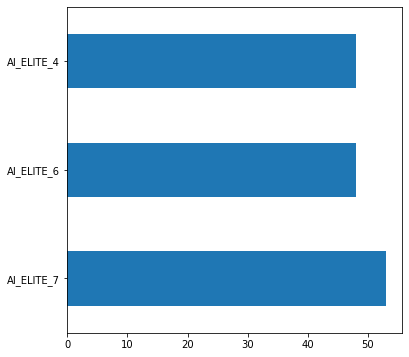

In [8]:
b.plot(kind = "barh", figsize=(6,6))

In [9]:
df["marks"] = df.score.str[:].str[0:1]

In [10]:
df

,batch,uid,score,marks
0,AI_ELITE_7,uid_149,6 / 7,6
1,AI_ELITE_7,uid_148,6 / 7,6
2,AI_ELITE_7,uid_147,7 / 7,7
3,AI_ELITE_7,uid_146,7 / 7,7
4,AI_ELITE_7,uid_145,4 / 7,4
...,...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7,4
145,AI_ELITE_4,uid_4,4 / 7,4
146,AI_ELITE_4,uid_3,4 / 7,4
147,AI_ELITE_4,uid_2,3 / 7,3


In [11]:
df.marks = df.marks.astype("int")

In [12]:
df.dtypes

batch    object
uid      object
score    object
marks     int32
dtype: object

In [15]:
#The uid & batch of candidates who got the highest marks of 7/7
for i in range(len(df.marks)):
    if df.marks[i] == 7:
        print(df.loc[i, "uid"], df.loc[i, "batch"])

uid_147 AI_ELITE_7
uid_146 AI_ELITE_7
uid_144 AI_ELITE_7
uid_142 AI_ELITE_7
uid_134 AI_ELITE_7
uid_133 AI_ELITE_7
uid_132 AI_ELITE_7
uid_130 AI_ELITE_7
uid_125 AI_ELITE_7
uid_114 AI_ELITE_7
uid_86 AI_ELITE_6
uid_82 AI_ELITE_6
uid_75 AI_ELITE_6
uid_71 AI_ELITE_6
uid_51 AI_ELITE_6
uid_48 AI_ELITE_4
uid_44 AI_ELITE_4
uid_10 AI_ELITE_4


In [14]:
#Batch wise avarage marks
rg = df.groupby("batch")["marks"].mean().reset_index()
rg

,batch,marks
0,AI_ELITE_4,3.791667
1,AI_ELITE_6,4.229167
2,AI_ELITE_7,5.056604


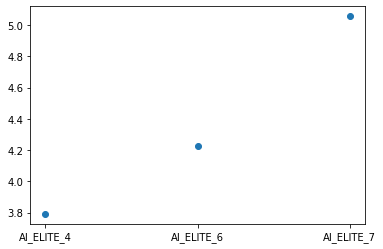

In [16]:
import matplotlib.pyplot as plt
plt.scatter(rg["batch"], rg["marks"])
plt.show()

In [17]:
#Count plot to show the marks distribution in each batch
import seaborn as sns

In [18]:
data =df.copy()

In [19]:
data=data[data["marks"]>=4]

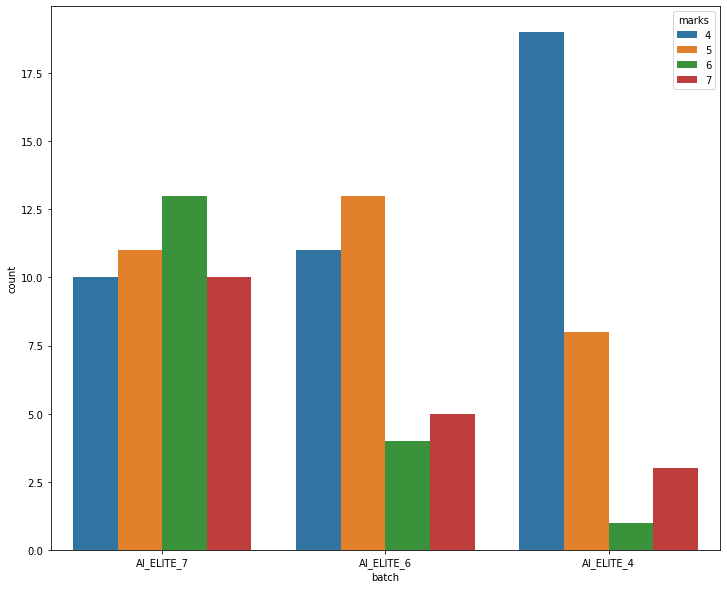

In [20]:
plt.figure(figsize=(12, 10))
sns.countplot(x = data["batch"], hue = data["marks"])
plt.show()